# Exercise 3: Implementing a Sequential Agent with StateGraph

In [12]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [10]:
class AgentState(TypedDict):
    name: str
    age: str
    skills : List[str]
    final_result: str

In [18]:
def first_node(state:AgentState) -> AgentState:
    """This node will greet the user"""

    state["final_result"] = f"{state['name']}, welcome to the system!"
    return state

def second_node(state:AgentState) -> AgentState:
    """This node will describe the user's age"""

    state["final_result"] += f" You are {state['age']} years old!"
    return state


def third_node(state:AgentState) -> AgentState:
    """This node will list the user's skills"""
    skills = ", ".join(state["skills"])
    state["final_result"] += f" Your skills include: {skills}."

    return state

In [19]:
graph = StateGraph(AgentState)

graph.add_node("personalize", first_node)
graph.add_node("age_description", second_node)
graph.add_node("skills_description", third_node)

graph.add_edge(START, "personalize")
graph.add_edge("personalize", "age_description")
graph.add_edge("age_description", "skills_description")
graph.add_edge("skills_description", END)
app = graph.compile()

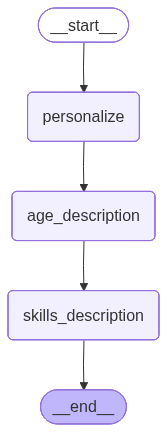

In [14]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [20]:
initial_state: AgentState = {
    "name": "Alice",
    "age": "30",
    "skills": ["Python", "Machine Learning", "Data Analysis"]
}

result = app.invoke(initial_state)
print(result["final_result"])

Alice, welcome to the system! You are 30 years old! Your skills include: Python, Machine Learning, Data Analysis.
